In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#import math

In [2]:
def pre_processamento():
    xlsx = pd.ExcelFile('casos_corona.xlsx')
    df = pd.read_excel(xlsx, 'casos_corona')
    df = df[:100] ################################limitando o dataset
    df = df[['bairroPaciente','municipioPaciente','resultadoFinalExame','sexoPaciente', 'idadePaciente']]
    
    novo_df = []
    for i in range(len(df)):
        if(df.loc[i][2] == 'Positivo'):
            resultado = 1
            novo_df.append([df.loc[i][0], df.loc[i][1], resultado, df.loc[i][3], df.loc[i][4]])
        else:
            resultado = 0
            novo_df.append([df.loc[i][0], df.loc[i][1], resultado, df.loc[i][3], df.loc[i][4]])
    
    novo_df = pd.DataFrame(novo_df)
    novo_df.rename(columns={0: 'bairro_paciente', 1: 'municipio_paciente', 2: 'resultado_exame', 3: 'sexo_paciente', 4: 'idade_paciente'}, inplace=True)    
    return novo_df

In [3]:
df = pre_processamento()
df

,bairro_paciente,municipio_paciente,resultado_exame,sexo_paciente,idade_paciente
0,VILA PERI,FORTALEZA,0,MASCULINO,74.0
1,VARJOTA,FORTALEZA,0,FEMININO,31.0
2,NOVA METROPOLE JUREMA,CAUCAIA,0,FEMININO,84.0
3,PARQUE POTIRA JUREMA,CAUCAIA,0,FEMININO,61.0
4,PINHEIRO,GUAIÚBA,0,MASCULINO,37.0
...,...,...,...,...,...
95,PLANALTO,CASCAVEL,0,MASCULINO,6.0
96,CENTRO,ITAREMA,0,MASCULINO,36.0
97,MONTE,CANINDE,1,MASCULINO,21.0
98,SAO VICENTE,INDEPENDENCIA,0,FEMININO,38.0


# Consulta por bairros

In [4]:
def agrupar_bairros(df):
    bairros = pd.unique(df['bairro_paciente'])
    casos_bairros = []
    for bairro in bairros:
        count = 0
        for i in range(len(df)):
            if(df.loc[i][0] == bairro):
                count = count + 1
        casos_bairros.append([bairro, count])
    casos_bairros = pd.DataFrame(casos_bairros)
    casos_bairros.rename(columns={0: 'bairro', 1: 'count'}, inplace=True)
    ordem = np.arange(1,len(casos_bairros)+1)
    casos_bairros['ordem'] = pd.Series(ordem, index=casos_bairros.index)
    return casos_bairros

In [95]:
dataset_bairros = agrupar_bairros(df)

In [6]:
def top_k_bairros(dataset, k):
    copia = dataset.copy()
    output = []
    for i in range(k):
        indice = copia['count'].idxmax()
        output.append([copia.loc[indice][0], copia.loc[indice][1]])
        copia.drop(indice, inplace=True,axis=0)
    output = pd.DataFrame(output)
    output = output.rename(columns={0: 'bairro', 1: 'count'})
    return output

In [7]:
top_k_bairros(dataset_bairros, 10)

,bairro,count
0,CENTRO,19
1,JUREMA,2
2,MESSEJANA,2
3,PIRAJA,2
4,ZONA RURAL,2
5,ARATURI,2
6,VILA PERI,1
7,VARJOTA,1
8,NOVA METROPOLE JUREMA,1
9,PARQUE POTIRA JUREMA,1


# Consulta por idade

In [8]:
def agrupar_idade(df):
    clusters_idades = []
    intervalos = np.arange(1, 100, dtype=int)
    for i in range(0, 95, 5):
        gaps = []
        for j in range(i, i+5):
            gaps.append(intervalos[j])
        clusters_idades.append(gaps)

    casos_idade = []

    for cluster in clusters_idades:
        count = 0
        for i in range(len(df)):
            if(df.loc[i][4] in cluster):
                count = count + 1
        casos_idade.append(['[{}:{}]'.format(cluster[0], cluster[4]), count])
    casos_idade = pd.DataFrame(casos_idade)
    casos_idade.rename(columns={0: 'idade', 1: 'count'}, inplace=True)
    ordem = np.arange(1,len(casos_idade)+1)
    casos_idade['ordem'] = pd.Series(ordem, index=casos_idade.index)
    return casos_idade

In [96]:
dataset_idade = agrupar_idade(df)

In [10]:
def top_k_idade(dataset, k):
    copia = dataset.copy()
    output = []
    for i in range(k):
        indice = copia['count'].idxmax()
        output.append([copia.loc[indice][0], copia.loc[indice][1]])
        copia.drop(indice, inplace=True,axis=0)
    output = pd.DataFrame(output)
    output = output.rename(columns={0: 'idade', 1: 'count'})
    return output

In [11]:
top_k_idade(dataset_idade, 10)

,idade,count
0,[36:40],16
1,[26:30],14
2,[31:35],11
3,[41:45],8
4,[61:65],8
5,[46:50],7
6,[21:25],6
7,[51:55],6
8,[76:80],5
9,[71:75],4


# Consulta por gênero

In [12]:
def agrupar_genero(df): 
    generos = pd.unique(df['sexo_paciente'])
    casos_genero = []
    for genero in generos:
        count = 0
        for i in range(len(df)):
            if(df.loc[i][3] == genero):
                count = count + 1
        casos_genero.append([genero, count])
    casos_genero = pd.DataFrame(casos_genero)
    casos_genero.rename(columns={0: 'genero', 1: 'count'}, inplace=True)
    ordem = np.arange(1,len(casos_genero)+1)
    casos_genero['ordem'] = pd.Series(ordem, index=casos_genero.index)
    return casos_genero

In [13]:
dataset_genero = agrupar_genero(df)
dataset_genero

,genero,count,ordem
0,MASCULINO,50,1
1,FEMININO,50,2


# Ruído de Laplace

In [14]:
def score_function_lap(registro, saida):
    if(registro[0] == saida):
        return -registro[2]
    else:
        return 0

In [15]:
def sensibilidade_lap(dataset):
    return 1

In [16]:
def erros_lap(query, argumento_consulta, k):
    erros_laplace = []
    top = list(query)
    for argumento in argumento_consulta:
        erro_argumento_lap = [0]*10
        for i in range(len(argumento)):
            if(argumento[i] == top[i]):
                erro = 0
            else:
                erro = abs(top.index(argumento[i]) - i)
            erro_argumento_lap[i]  = erro
        erros_laplace.append(erro_argumento_lap)
    return erros_laplace

In [17]:
def plot_erros(erros_argumento, k):
    df = pd.DataFrame({
        'epsilon': ['0.1', '1', '10'],
        'erro': erros_argumento,
        'k = %i'%(k): k})
    return df.plot(kind='bar', x='epsilon')

### Consulta Bairros com Ruído

In [18]:
def laplace_bairros(budget, sensibilidade, query, dataset, k):
    resposta_query = np.array(query['count'])
    coluna_bairros = np.array(query['bairro'])
    output = []
    np.random.seed(123)
    for i in range(k):
        ruido = stats.laplace.rvs(loc = 0, scale = sensibilidade/budget)
        output.append((resposta_query[i] + ruido))
    output = {
        'bairro': coluna_bairros,
        'count': output
    }
    
    df = pd.DataFrame(output, columns = ['bairro', 'count'])
    return df.sort_values(by=['count'],ascending=False)

In [65]:
budgets = [0.1, 1, 10]
k = 10
bairros = []
for budget in budgets:
    a = laplace_bairros(budget, sensibilidade_lap(dataset_bairros), top_k_bairros(dataset_bairros, k), dataset_bairros, k)
    a = np.array(a)
    print("epsilon: {}\ntop-{}:\n{}\n\n".format(budget, k, a))
    bairros.append(a[:,0])

epsilon: 0.1
top-10:
[['VILA PERI' 33.57834888254776]
 ['CENTRO' 23.9912496292116]
 ['ZONA RURAL' 7.779237549274969]
 ['VARJOTA' 5.6149509319177975]
 ['PIRAJA' 3.082865012547421]
 ['NOVA METROPOLE JUREMA' 0.6111758470501567]
 ['ARATURI' 0.330157277395263]
 ['PARQUE POTIRA JUREMA' -1.4304651224855673]
 ['JUREMA' -3.581292210973028]
 ['MESSEJANA' -5.9031268473211655]]


epsilon: 1
top-10:
[['CENTRO' 19.49912496292116]
 ['VILA PERI' 4.257834888254775]
 ['ZONA RURAL' 2.5779237549274967]
 ['PIRAJA' 2.1082865012547423]
 ['ARATURI' 1.8330157277395263]
 ['VARJOTA' 1.4614950931917798]
 ['JUREMA' 1.4418707789026972]
 ['MESSEJANA' 1.2096873152678835]
 ['NOVA METROPOLE JUREMA' 0.9611175847050156]
 ['PARQUE POTIRA JUREMA' 0.7569534877514432]]


epsilon: 10
top-10:
[['CENTRO' 19.049912496292116]
 ['ZONA RURAL' 2.05779237549275]
 ['PIRAJA' 2.0108286501254744]
 ['ARATURI' 1.9833015727739527]
 ['JUREMA' 1.9441870778902697]
 ['MESSEJANA' 1.9209687315267883]
 ['VILA PERI' 1.3257834888254776]
 ['VARJOTA' 

In [66]:
#inverti linha/coluna pra fazer a acumulada dos k pra plotar pra cada k
erros_bairro = erros_lap(top_k_bairros(dataset_bairros, 10)['bairro'], bairros, 10)
lista_plot = []
for i in range(k):
    p_cada_k = []
    for b in range(len(budgets)):
        aux = erros_bairro[b][i]
        p_cada_k.append(aux)
    lista_plot.append(p_cada_k)
print(erros_bairro)

[[6, 1, 2, 4, 1, 3, 1, 2, 7, 7], [0, 5, 2, 0, 1, 2, 5, 5, 0, 0], [0, 3, 1, 2, 3, 3, 0, 0, 0, 0]]


In [43]:
copia = lista_plot.copy()
aux = []
aux.append(copia[0])
for i in range(1, k):
    copia[i][0] += copia[i-1][0] 
    copia[i][1] += copia[i-1][1] 
    copia[i][2] += copia[i-1][2]
    aux.append([copia[i][0], copia[i][1], copia[i][2]])
aux

[[6, 0, 0],
 [7, 5, 3],
 [9, 7, 4],
 [13, 7, 6],
 [14, 8, 9],
 [17, 10, 12],
 [18, 15, 12],
 [20, 20, 12],
 [27, 20, 12],
 [34, 20, 12]]

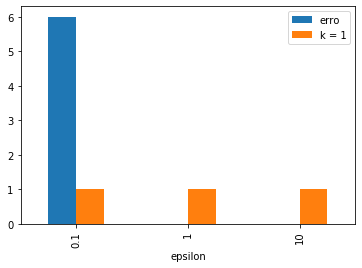

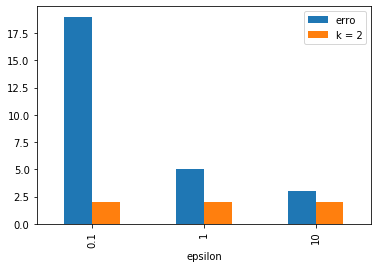

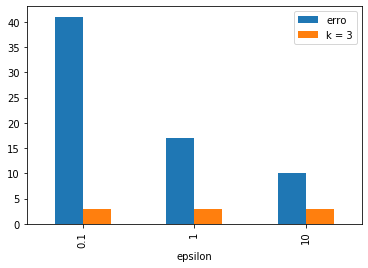

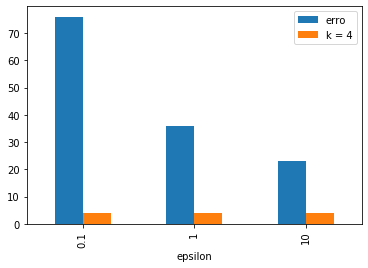

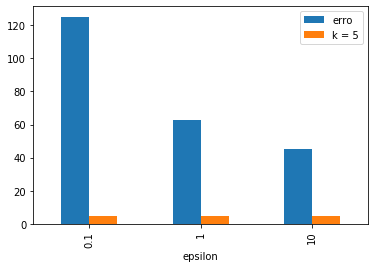

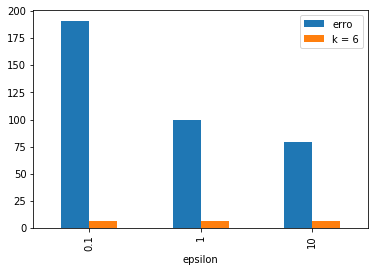

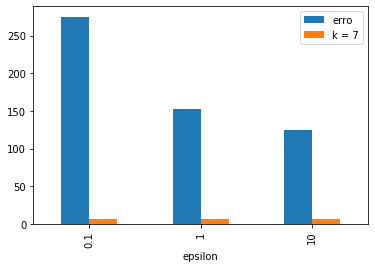

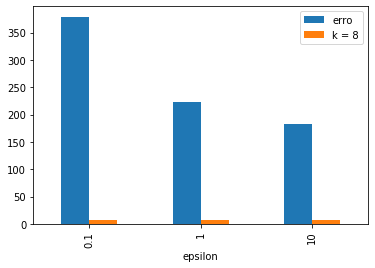

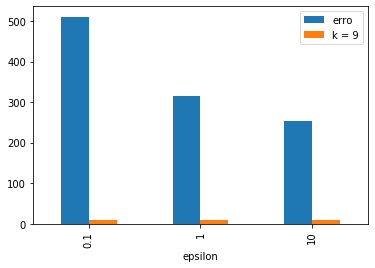

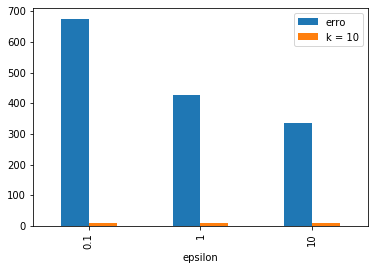

In [26]:
for i in range(0, k):
    plot_erros(aux[i], i+1)

### Consulta Idade com ruído

In [27]:
def laplace_idade(budget, sensibilidade, query, dataset, k):
    resposta_query = np.array(query['count'])
    coluna_idades = np.array(query['idade'])
    output = []
    np.random.seed(123)
    for i in range(k):
        ruido = stats.laplace.rvs(loc = 0, scale = sensibilidade/budget)
        output.append((resposta_query[i] + ruido))
    output = {
        'idade': coluna_idades,
        'count': output
    }
    
    df = pd.DataFrame(output, columns = ['idade', 'count'])
    return df.sort_values(by=['count'],ascending=False)

In [28]:
budgets = [0.1, 1, 10]
idades = []
k = 10
for budget in budgets:
    a = laplace_idade(budget, sensibilidade_lap(dataset_idade), top_k_idade(dataset_idade, 10), dataset_idade, 10)
    a = np.array(a)
    print("epsilon: {}\ntop-k:\n{}\n\n".format(budget, a))
    idades.append(a[:,0])

epsilon: 0.1
top-k:
[['[21:25]' 38.57834888254776]
 ['[36:40]' 20.9912496292116]
 ['[61:65]' 13.779237549274969]
 ['[51:55]' 10.614950931917797]
 ['[41:45]' 9.08286501254742]
 ['[26:30]' 8.418707789026971]
 ['[46:50]' 5.330157277395263]
 ['[76:80]' 4.6111758470501565]
 ['[31:35]' 3.0968731526788345]
 ['[71:75]' 1.5695348775144327]]


epsilon: 1
top-k:
[['[36:40]' 16.49912496292116]
 ['[26:30]' 13.441870778902697]
 ['[31:35]' 10.209687315267884]
 ['[21:25]' 9.257834888254775]
 ['[61:65]' 8.577923754927497]
 ['[41:45]' 8.108286501254742]
 ['[46:50]' 6.833015727739526]
 ['[51:55]' 6.46149509319178]
 ['[76:80]' 4.961117584705016]
 ['[71:75]' 3.7569534877514434]]


epsilon: 10
top-k:
[['[36:40]' 16.049912496292116]
 ['[26:30]' 13.94418707789027]
 ['[31:35]' 10.920968731526788]
 ['[61:65]' 8.057792375492749]
 ['[41:45]' 8.010828650125474]
 ['[46:50]' 6.983301572773953]
 ['[21:25]' 6.325783488825477]
 ['[51:55]' 6.046149509319178]
 ['[76:80]' 4.9961117584705015]
 ['[71:75]' 3.9756953487751443

In [44]:
query_idades = top_k_idade(dataset_idade, 10)['idade']
erros_idade = erros_lap(query_idades, idades, 10)
lista_plot_idades = []
for i in range(k):
    p_cada_k = []
    for b in range(len(budgets)):
        aux = erros_idade[b][i]
        p_cada_k.append(aux)
    lista_plot_idades.append(p_cada_k)

In [45]:
copia_idades = lista_plot_idades.copy()
aux_idades = []
aux_idades.append(copia_idades[0])
for i in range(1, k):
    copia_idades[i][0] += copia_idades[i-1][0] 
    copia_idades[i][1] += copia_idades[i-1][1] 
    copia_idades[i][2] += copia_idades[i-1][2]
    aux_idades.append([copia_idades[i][0], copia_idades[i][1], copia_idades[i][2]])
aux_idades

[[6, 0, 0],
 [7, 0, 0],
 [9, 0, 0],
 [13, 3, 1],
 [14, 3, 2],
 [18, 5, 2],
 [19, 6, 2],
 [20, 6, 2],
 [26, 6, 2],
 [26, 6, 2]]

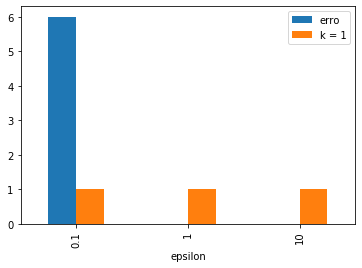

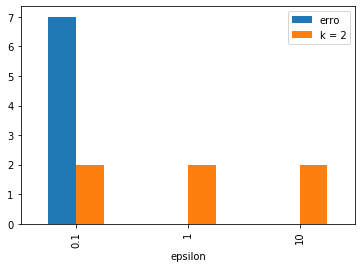

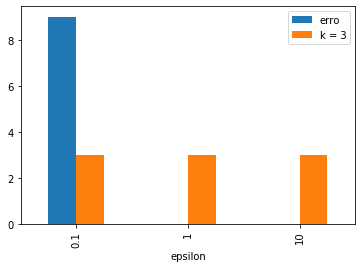

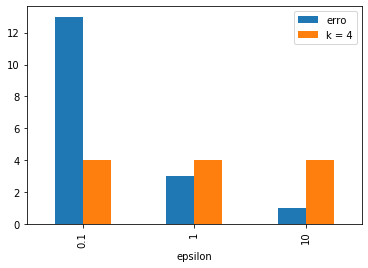

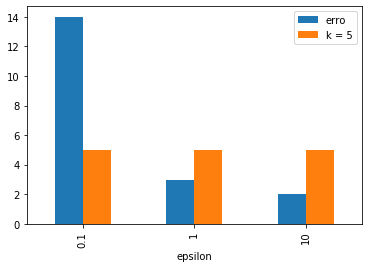

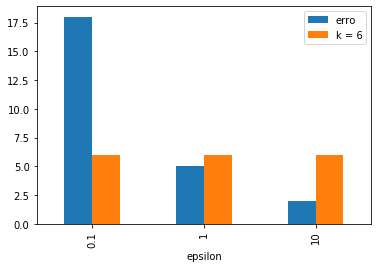

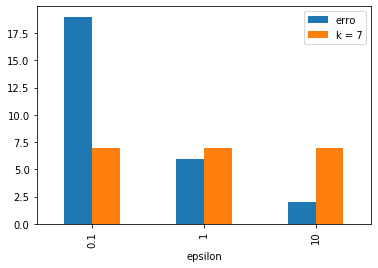

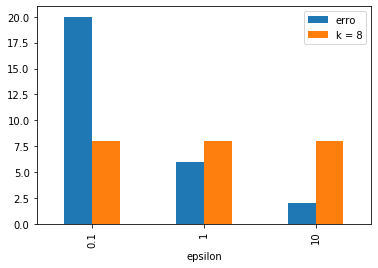

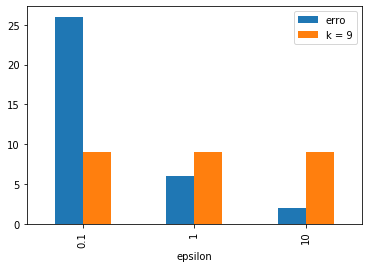

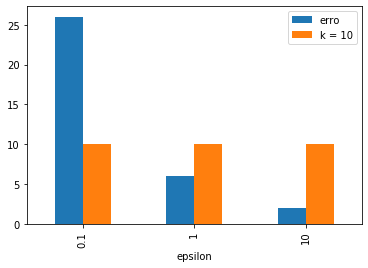

In [46]:
for i in range(0, k):
    plot_erros(aux_idades[i], i+1)

# Mecanismo Exponencial

In [49]:
def score_function_exp(registro, saida):
    if(registro[0] == saida):
        return registro[1]
    else:
        return 0

In [50]:
def sensibilidade_exp(dataset):
    return 1

In [67]:
def erros_exp(query, argumento_consulta, k):
    erros_exponencial = []
    top = list(query)
    for argumento in argumento_consulta:
        erro_argumento_exp = [0]*10
        for i in range(len(argumento)):
            if(argumento[i] in top):
                if(argumento[i] == top[i]):
                    erro = 0
                else:
                    erro = abs(top.index(argumento[i]) - i)
            else:
                erro = 100
            erro_argumento_exp[i]  = erro
        erros_exponencial.append(erro_argumento_exp)
    return erros_exponencial

### Consulta Bairros Randomizada


In [68]:
def exponencial_bairros(budget, sensibilidade, dataset, k):
    budget = budget/k
    probabilidades = []
    pk = []
    saidas = dataset['bairro']
    xk = np.arange(len(saidas))
    for out in saidas:
        linha = []
        for i in range(len(dataset)):
            registro = dataset.loc[i]
            numerador = np.exp(budget*score_function_exp(registro,out)/(2*sensibilidade))
            denominador = 0
            for saida in saidas:
                denominador += np.exp(budget*score_function_exp(registro, saida)/(2*sensibilidade))
            linha.append(numerador/denominador)
        probabilidades.append(linha)
    for prob in probabilidades:
        pk.append(np.sum(prob)/np.sum(probabilidades))
    dist = stats.rv_discrete(name='dist', values=(xk, pk))
    output = []

    for i in range(k):
        valido = False
        while(not valido):
            indice = dist.rvs()
            if([saidas[indice], dataset.loc[indice][1]] not in output):
                output.append([saidas[indice], dataset.loc[indice][1]])
                valido = True
        
    output = pd.DataFrame(output)
    output = output.rename(columns={0: 'bairro', 1: 'count'})
    return output.sort_values(by=['count'],ascending=False)

In [69]:
budgets = [0.1, 1, 10]
bairros = []
k = 10
for budget in budgets:
    e = exponencial_bairros(budget, sensibilidade_exp(dataset_bairros), dataset_bairros, k)
    e = np.array(e)
    print("epsilon: {}\ntop-k:\n{}\n\n".format(budget, e))
    bairros.append(e[:,0])

epsilon: 0.1
top-k:
[['ZONA RURAL' 2]
 ['PIRAMBÚ' 1]
 ['VILA SANTO ANTONIO' 1]
 ['PINHEIRO' 1]
 ['ANTONIO BEZERRA' 1]
 ['SÃO RAIMUNDO' 1]
 ['TABUBA' 1]
 ['AREA NOBRE' 1]
 ['PLANALTO HORIZONTE' 1]
 ['VIOLETE' 1]]


epsilon: 1
top-k:
[['ZONA RURAL' 2]
 ['UMARIZEIRAS' 1]
 ['FORQUILHA' 1]
 ['VICENTE PIZON' 1]
 ['MONTESE' 1]
 ['LAGOA REDONDA' 1]
 ['MEIRELES' 1]
 ['PLANALTO HORIZONTE' 1]
 ['PL CAUCAIA' 1]
 ['LAGOA DO TOCO' 1]]


epsilon: 10
top-k:
[['ALTO DO CRITO' 1]
 ['CRUZEIRO' 1]
 ['SANTO ANTÔNIO' 1]
 ['BELA VISTA' 1]
 ['LAGOA DO TOCO' 1]
 ['FORQUILHA' 1]
 ['TABAPUA' 1]
 ['SAO JOAO DO TAUAPE' 1]
 ['SINHÁ SABÓIA' 1]
 ['CAPONGUINHA' 1]]




In [72]:
erros_bairro = erros_exp(top_k_bairros(dataset_bairros, 10)['bairro'], bairros, 10)
lista_plot_exp = []
for i in range(k):
    p_cada_k = []
    for b in range(len(budgets)):
        aux = erros_bairro[b][i]
        p_cada_k.append(aux)
    lista_plot_exp.append(p_cada_k)

In [73]:
copia_bairros = lista_plot_exp.copy()
aux_bairros = []
aux_bairros.append(copia_bairros[0])
for i in range(1, k):
    copia_bairros[i][0] += copia_bairros[i-1][0] 
    copia_bairros[i][1] += copia_bairros[i-1][1] 
    copia_bairros[i][2] += copia_bairros[i-1][2]
    aux_bairros.append([copia_bairros[i][0], copia_bairros[i][1], copia_bairros[i][2]])
aux_bairros

[[4, 4, 100],
 [104, 104, 200],
 [204, 204, 300],
 [304, 304, 400],
 [404, 404, 500],
 [504, 504, 600],
 [604, 604, 700],
 [704, 704, 800],
 [804, 804, 900],
 [904, 904, 1000]]

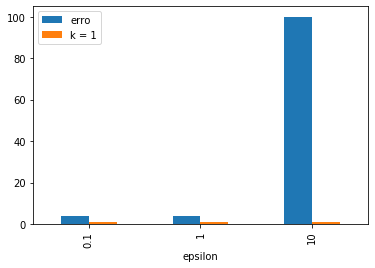

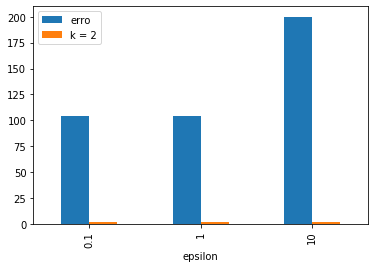

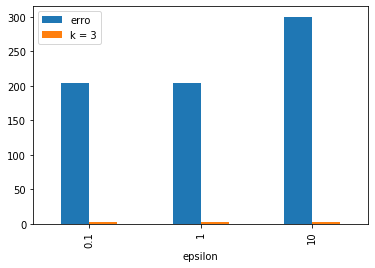

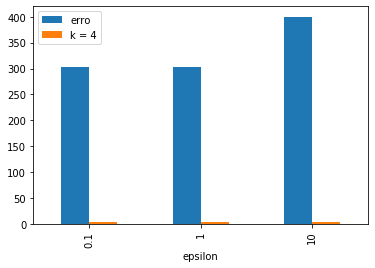

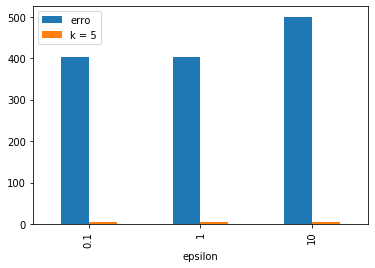

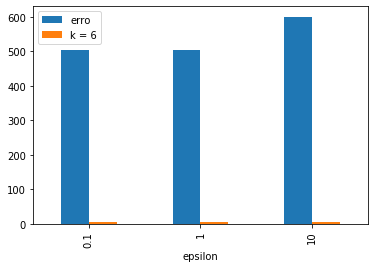

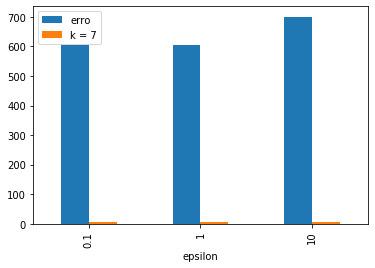

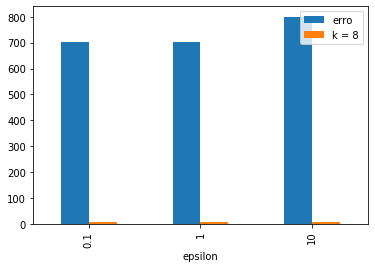

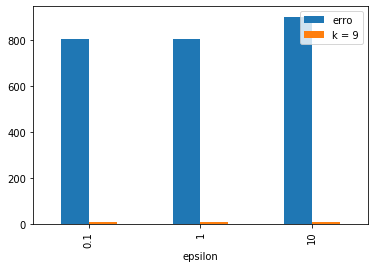

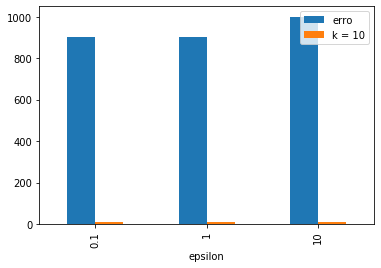

In [74]:
for i in range(0, k):
    plot_erros(aux_bairros[i], i+1)

### Consulta Idades Randomizada

In [91]:
def exponencial_idades(budget, sensibilidade, dataset, k):
    budget = budget/k
    probabilidades = []
    pk = []
    saidas = dataset['idade']
    xk = np.arange(len(saidas))
    for out in saidas:
        linha = []
        for i in range(len(dataset)):
            registro = dataset.loc[i]
            numerador = np.exp(budget*score_function_exp(registro,out)/(2*sensibilidade))
            denominador = 0
            for saida in saidas:
                denominador += np.exp(budget*score_function_exp(registro, saida)/(2*sensibilidade))
            linha.append(numerador/denominador)
        probabilidades.append(linha)
    for prob in probabilidades:
        pk.append(np.sum(prob)/np.sum(probabilidades))
    dist = stats.rv_discrete(name='dist', values=(xk, pk))
    output = []

    for i in range(k):
        valido = False
        while(not valido):
            indice = dist.rvs()
            if([saidas[indice], dataset.loc[indice][1]] not in output):
                output.append([saidas[indice], dataset.loc[indice][1]])
                valido = True
        
    output = pd.DataFrame(output)
    output = output.rename(columns={0: 'idade', 1: 'count'})
    return output.sort_values(by=['count'],ascending=False)

In [107]:
budgets = [0.1, 1, 10]
idades_exp = []
k = 10
for budget in budgets:
    ex = exponencial_idades(budget, sensibilidade_exp(dataset_idade), dataset_idade, k)
    ex = np.array(ex)
    print("epsilon: {}\ntop-k:\n{}\n\n".format(budget, ex))
    idades_exp.append(ex[:,0])

epsilon: 0.1
top-k:
[['[36:40]' 16]
 ['[26:30]' 14]
 ['[31:35]' 11]
 ['[61:65]' 8]
 ['[41:45]' 8]
 ['[21:25]' 6]
 ['[51:55]' 6]
 ['[81:85]' 4]
 ['[86:90]' 1]
 ['[56:60]' 1]]


epsilon: 1
top-k:
[['[36:40]' 16]
 ['[61:65]' 8]
 ['[46:50]' 7]
 ['[51:55]' 6]
 ['[81:85]' 4]
 ['[16:20]' 2]
 ['[91:95]' 1]
 ['[1:5]' 1]
 ['[86:90]' 1]
 ['[6:10]' 1]]


epsilon: 10
top-k:
[['[36:40]' 16]
 ['[26:30]' 14]
 ['[31:35]' 11]
 ['[61:65]' 8]
 ['[51:55]' 6]
 ['[76:80]' 5]
 ['[81:85]' 4]
 ['[71:75]' 4]
 ['[66:70]' 3]
 ['[86:90]' 1]]




In [108]:
query_idades_exp = top_k_idade(dataset_idade, 10)['idade']
erros_idade_exp = erros_exp(query_idades_exp, idades_exp, 10)
exp_plot_idades = []
for i in range(k):
    p_cada_k = []
    for b in range(len(budgets)):
        aux = erros_idade_exp[b][i]
        p_cada_k.append(aux)
    exp_plot_idades.append(p_cada_k)

In [109]:
copia_idades_exp = exp_plot_idades.copy()
aux_idades_exp = []
aux_idades_exp.append(copia_idades_exp[0])
for i in range(1, k):
    copia_idades_exp[i][0] += copia_idades_exp[i-1][0] 
    copia_idades_exp[i][1] += copia_idades_exp[i-1][1] 
    copia_idades_exp[i][2] += copia_idades_exp[i-1][2]
    aux_idades_exp.append([copia_idades_exp[i][0], copia_idades_exp[i][1], copia_idades_exp[i][2]])
aux_idades_exp

[[0, 0, 0],
 [0, 3, 0],
 [0, 6, 0],
 [1, 10, 1],
 [2, 110, 4],
 [3, 210, 7],
 [4, 310, 107],
 [104, 410, 109],
 [204, 510, 209],
 [304, 610, 309]]

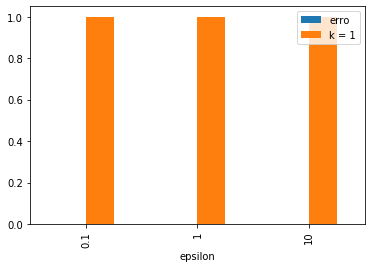

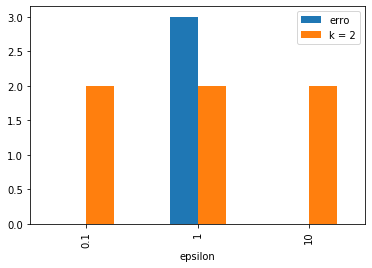

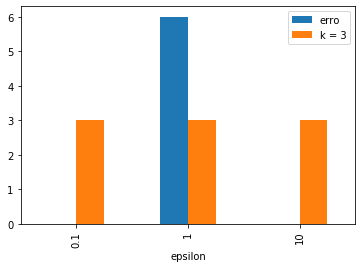

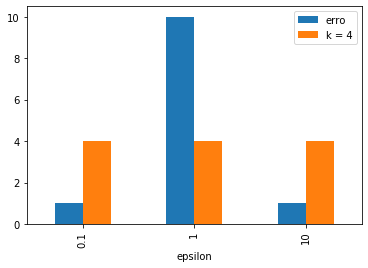

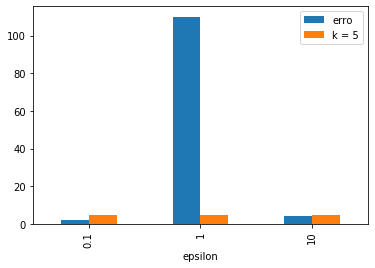

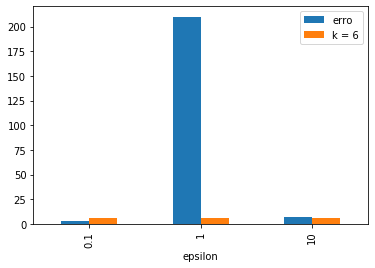

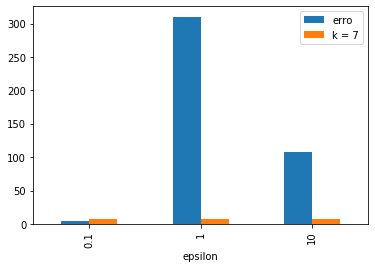

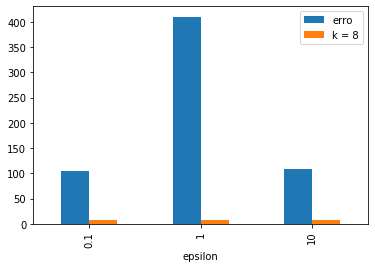

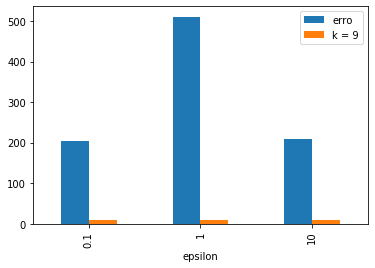

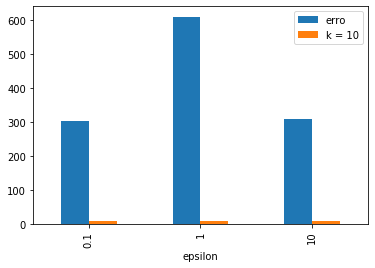

In [111]:
for i in range(0, k):
    plot_erros(aux_idades_exp[i], i+1)